In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
import string
import seaborn as sns

In [65]:
def load_tweets_data(name): 
    csv_path = os.path.join("./twitter_cleaned/", name) 
    return pd.read_csv(csv_path)

trainTweets = load_tweets_data("train_posts.csv")
testTweets = load_tweets_data("test_posts.csv")

In [66]:
trainTweets.drop(["post_text"],axis=1,inplace=True)
trainTweets.drop(["post_id"],axis=1,inplace=True)
trainTweets.drop(["user_id"],axis=1,inplace=True)
trainTweets.drop(["username"],axis=1,inplace=True)

In [67]:
split_result = trainTweets['image_id'].str.split('_',expand=True)
trainTweets.insert(0, 'event', split_result[0])
trainTweets.drop(["image_id"],axis=1,inplace=True)

In [68]:
split_time = trainTweets['timestamp'].str.split(' ',expand=True)
split_time = split_time.iloc[:,[5,1,2]]
split_time

,5,1,2
0,2013,Apr,17
1,2013,Apr,19
2,2013,Apr,19
3,2013,Apr,17
4,2013,Apr,17
...,...,...,...
13361,2015,Apr,03
13362,2015,Apr,03
13363,2015,Apr,03
13364,2015,Apr,03


In [69]:
dict_month = {'Jan':'1','Feb':'2','Mar':'3','Apr':'4','May':'5','Jun':'6',
              'Jul':'7','Aug':'8','Sep':'9','Oct':'10','Nov':'11','Dec':'12'}
data = []
for index, value in split_time[1].items():
    data.append(dict_month.get(value))

split_time.insert(1, 'time', data)
split_time.drop([1],axis=1,inplace=True)
split_time.columns=['year','month','day']

In [70]:
test = split_time
test["time_month"] = test["year"] +'.'+ test["month"]+'.'+ test["day"]
# test.drop(["year"],axis=1,inplace=True)
# test.drop(["month"],axis=1,inplace=True)
# test.drop(["day"],axis=1,inplace=True)
# test.drop(["time"],axis=1,inplace=True)
# test.drop(["time_"],axis=1,inplace=True)
test

,year,month,day,time_month
0,2013,4,17,2013.4.17
1,2013,4,19,2013.4.19
2,2013,4,19,2013.4.19
3,2013,4,17,2013.4.17
4,2013,4,17,2013.4.17
...,...,...,...,...
13361,2015,4,03,2015.4.03
13362,2015,4,03,2015.4.03
13363,2015,4,03,2015.4.03
13364,2015,4,03,2015.4.03


In [71]:
test.drop(["year"],axis=1,inplace=True)
test.drop(["month"],axis=1,inplace=True)
test.drop(["day"],axis=1,inplace=True)

In [72]:
final = pd.concat([trainTweets,test], axis=1)
final.drop(["timestamp"],axis=1,inplace=True)
final.head()

,event,label,time_month
0,boston,fake,2013.4.17
1,boston,fake,2013.4.19
2,boston,fake,2013.4.19
3,boston,fake,2013.4.17
4,boston,fake,2013.4.17


final为最终格式

In [25]:
event = final.event.unique()
print(event,len(event))
final['event'].value_counts()

['boston' 'malaysia' 'passport' 'sandy' 'sochi' 'bringback'
 'columbianChemicals' 'elephant' 'livr' 'pigFish' 'underwater' 'eclipse'
 'samurai' 'nepal' 'garissa'] 15


sandy                 9818
nepal                 1360
boston                 523
malaysia               310
eclipse                275
sochi                  274
samurai                218
columbianChemicals     185
bringback              131
underwater             113
garissa                 79
passport                44
pigFish                 14
elephant                13
livr                     9
Name: event, dtype: int64

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

In [32]:
data

,A,B,C,D
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-12-26,-18.482826,10.330142,-12.108625,14.878444
2016-12-27,-18.693797,10.391382,-12.020502,15.376387
2016-12-28,-18.752957,10.062616,-11.685921,15.996722
2016-12-29,-18.918042,9.957435,-11.244617,16.669990


<AxesSubplot:>

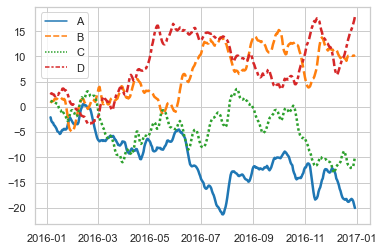

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(5).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [50]:
nepal = final.loc[final['event'] == 'nepal']
nepal

,event,label,time_month
11927,nepal,fake,2015.5
11928,nepal,fake,2015.5
11929,nepal,fake,2015.5
11930,nepal,fake,2015.5
11931,nepal,fake,2015.5
...,...,...,...
13282,nepal,real,2015.4
13283,nepal,real,2015.4
13284,nepal,real,2015.4
13285,nepal,real,2015.4


In [52]:
boston = final.loc[final['event'] == 'boston']
boston

,event,label,time_month
0,boston,fake,2013.4
1,boston,fake,2013.4
2,boston,fake,2013.4
3,boston,fake,2013.4
4,boston,fake,2013.4
...,...,...,...
7169,boston,real,2013.4
7170,boston,real,2013.4
7171,boston,real,2013.4
7172,boston,real,2013.4


In [73]:
final.to_csv("final_.csv", encoding='utf-8', index=False)